# 降维

2 降维 （第二讲——大数据预处理）


** Notes： 这是《大数据金融》第2章第4节案例的代码（python版）**


In [2]:
#导入数据
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
index = pd.read_csv(r'/Users/yumanlou/Library/CloudStorage/OneDrive-email.cufe.edu.cn/2025/第五学期/论文/ESG/carbon_emission_finance/data/data1.2.csv')
index.head()

,uid,province_id,province,year,co2_emissions,gdp,green_invention_patents,green_utility_patents,credit,bond,investment,insurance,equity,fund,carbon_finance,gfindex,green_finance_pilot
0,3100,1,Shanghai,2000,7.153818e+07,4880.0,98.0,109.0,0.024,0.067,0.120,0.007,0.034,0.030,6.212,0.168,0
1,3101,1,Shanghai,2001,6.964592e+07,5348.1,165.0,202.0,0.024,0.069,0.095,0.011,0.037,0.030,6.250,0.136,0
2,3102,1,Shanghai,2002,8.086629e+07,5908.1,272.0,230.0,0.025,0.076,0.101,0.010,0.038,0.035,5.533,0.226,0
3,3103,1,Shanghai,2003,9.231935e+07,6952.5,382.0,254.0,0.024,0.079,0.116,0.009,0.040,0.037,4.827,0.194,0
4,3104,1,Shanghai,2004,1.082541e+08,8309.4,451.0,354.0,0.025,0.084,0.081,0.013,0.040,0.039,4.367,0.190,0


In [2]:
# 标准化
scaler = StandardScaler()  
scaler.fit(index.iloc[:,3:21]) 
index_scaler = pd.DataFrame(scaler.transform(index.iloc[:,3:21]))  
index_scaler.columns = index.columns[3:21]
code = index.iloc[:,2] #股票代码
index_new = pd.concat([code,index_scaler],axis = 1)

print(index_scaler.shape[1])  # 查看特征变量的个数
index_cor=index_scaler.corr()
index_cor.to_excel('index_cor.xlsx')
index_new.head()  # 查看标准化后的数据

18


,stkcd,A1,A2,A3,B1,B2,B3,B4,C1,C2,C3,D1,D2,D3,D4,E1,E2,E3,E4
0,8,-0.653322,-0.495476,-0.428777,1.169338,-0.460313,-0.849310,0.180865,0.767117,0.857283,0.392489,2.535466,-0.052915,4.961378,2.535466,-0.216326,-0.782921,-0.561057,-0.485026
1,8,-0.523692,-0.379327,-0.366747,1.219648,-0.300065,-0.594613,0.182521,0.710234,0.785793,0.284655,2.564883,-0.090625,5.137027,2.564883,-0.206847,-0.637671,-0.470545,-0.449159
2,8,0.209888,0.269338,-0.018603,1.330519,-0.216668,-0.547996,0.180386,0.894617,0.991454,0.460996,2.744781,-1.303381,5.585399,2.744781,-0.199584,-0.549773,-0.390426,-0.416978
3,8,1.100141,1.173805,0.544164,1.436846,0.002438,-0.318669,0.172407,0.354708,0.542507,0.009466,3.059509,-1.231411,7.306217,3.059509,-0.179826,-0.362672,-0.252328,-0.350092
4,8,-0.666959,-0.508578,-0.434493,0.692864,-0.706805,-0.817502,0.144668,0.484925,0.630377,-0.031936,-0.207403,-0.146111,-0.568542,-0.207403,-0.216854,-0.807081,-0.570328,-0.487535


### 下面是标准化的第二版本

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np # 用于后续PCA/FA

# 1. 读取数据（假设文件名为 'data1.2_pca.csv'）
# 注意：请确保你的 index 变量已经加载了数据。
# 这里我们假设原始数据被加载到名为 'index' 的 DataFrame 中。
try:
    index = pd.read_csv('/Users/yumanlou/Library/CloudStorage/OneDrive-email.cufe.edu.cn/2025/第五学期/论文/ESG/carbon_emission_finance/data/data1.2_pca.csv')
except FileNotFoundError:
    print("错误：请确保 'data1.2_pca.csv' 文件已正确加载到环境中。")
    # 如果文件已加载，请注释掉上面两行，使用已加载的 index 变量。

# 2. 确定需要标准化的列
# 如果要对所有列进行标准化，我们选择从第 0 列到最后一列（iloc[:, 0:]）。
# 由于您的文件中没有独立的标识符，我们选择所有列。
COLUMNS_TO_STANDARDIZE = index.columns[:]
X = index[COLUMNS_TO_STANDARDIZE]

# --- 缺失值检查与处理（非常关键） ---
# 在标准化和 PCA 之前，必须处理缺失值。
# 根据您之前的问题，我们使用中位数填充。

# 使用中位数填充 NaN 值
median_values = X.median()
X_filled = X.fillna(median_values)

# 3. 执行 Z-Score 标准化
scaler = StandardScaler()
scaler.fit(X_filled)  # 用已填充的数据计算均值和标准差

# 4. 转换数据并重建 DataFrame
index_scaler = pd.DataFrame(scaler.transform(X_filled), columns=COLUMNS_TO_STANDARDIZE)

# 5. （旧代码中“股票代码”的部分不再适用，因为所有列都被标准化）
#    如果您需要保留省份ID和年份，请根据实际列名从 index 中提取。
#    这里我们只保留标准化后的数据。
index_new = index_scaler.copy()


# --- 结果检验与导出 ---

# 查看特征变量的个数 (应该是 11 个)
print(f"标准化后的特征变量总数: {index_scaler.shape[1]}")

# 计算相关系数矩阵并导出
index_cor = index_scaler.corr()
index_cor.to_excel('index_cor.xlsx')
print("相关系数矩阵已导出到 'index_cor.xlsx'")

# 查看标准化后的数据
print("\n标准化后的数据 (前 5 行):")
print(index_new.head())

标准化后的特征变量总数: 11
相关系数矩阵已导出到 'index_cor.xlsx'

标准化后的数据 (前 5 行):
   co2_emissions       gdp  green_invention_patents  green_utility_patents  \
0      -0.889347 -0.629348                -0.467859              -0.474313   
1      -0.897561 -0.607571                -0.451554              -0.451901   
2      -0.848854 -0.581517                -0.425513              -0.445154   
3      -0.799138 -0.532928                -0.398743              -0.439370   
4      -0.729966 -0.469800                -0.381951              -0.415271   

     credit      bond  investment  insurance    equity      fund  \
0 -1.503523 -1.758999   -0.290642  -0.964645 -1.788483 -1.788704   
1 -1.503523 -1.674987   -0.341787  -0.843295 -1.546462 -1.788704   
2 -1.380975 -1.380945   -0.329512  -0.873632 -1.465788 -1.330504   
3 -1.503523 -1.254928   -0.298825  -0.903970 -1.304441 -1.147224   
4 -1.380975 -1.044898   -0.370428  -0.782620 -1.304441 -0.963944   

   carbon_finance  
0        0.296567  
1        0.302692  


In [3]:
# 因子分析
import matplotlib.pyplot as plt  
from factor_analyzer import FactorAnalyzer  
index_time_mean=index_new.groupby('stkcd').mean()#求各只股票18个指标的季度均值

# 创建因子分析对象，根据贡献率初步确定因子个数
fa_test = FactorAnalyzer(n_factors=18,rotation=None,method='principal')#未旋转
fa_test.fit(index_time_mean)
ev, v = fa_test.get_eigenvalues()  # 输出因子相关矩阵和特征值
var =  pd.DataFrame(np.round(fa_test.get_factor_variance(),3)) # 输出贡献率:5个因子可以解释80%以上
print("\n各因子的贡献率:\n",var)
var.to_excel('var.xlsx')


各因子的贡献率:
       0      1      2      3      4      5      6      7      8      9   \
0  3.955  3.309  3.221  2.387  1.771  0.976  0.891  0.539  0.269  0.222   
1  0.220  0.184  0.179  0.133  0.098  0.054  0.049  0.030  0.015  0.012   
2  0.220  0.404  0.582  0.715  0.813  0.868  0.917  0.947  0.962  0.974   

      10     11     12     13     14     15     16     17  
0  0.164  0.101  0.088  0.056  0.031  0.016  0.007  1.683  
1  0.009  0.006  0.005  0.003  0.002  0.001  0.000  0.094  
2  0.983  0.989  0.994  0.997  0.999  1.000  1.000  1.094  


KMO检验统计量: 0.8720
Bartlett's 球形检验 P值: 0.0000


/Users/yumanlou/conda_env/gnews/lib/python3.12/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
/Users/yumanlou/conda_env/gnews/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


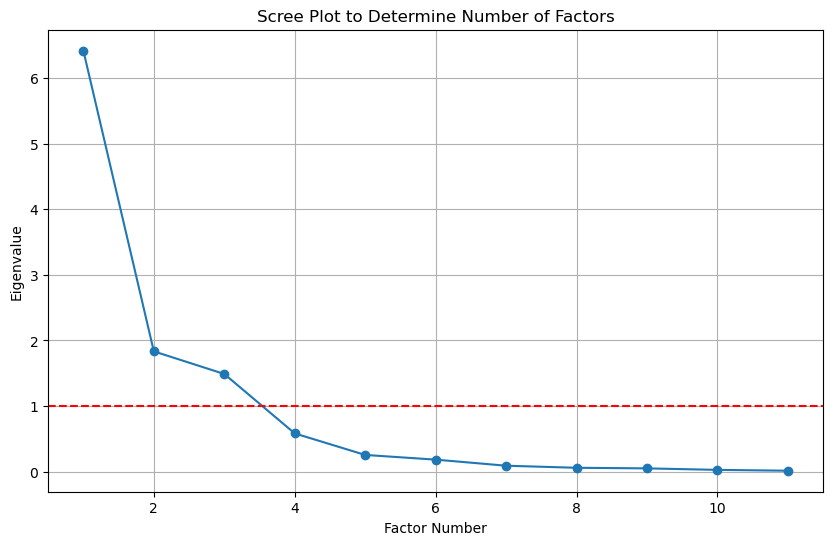


--- 因子分析结果 ---
各因子的方差贡献率:
    SS Loadings  Proportion Var  Cumulative Var
0         6.417           0.583           0.583
1         1.834           0.167           0.750
2         1.489           0.135           0.885
3         0.583           0.053           0.938
4         0.255           0.023           0.962
5         0.183           0.017           0.978
6         0.090           0.008           0.986
7         0.059           0.005           0.992
8         0.050           0.005           0.996
9         0.027           0.002           0.999
10        0.014           0.001           1.000


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 确保你已安装 factor_analyzer 库: pip install factor-analyzer
from factor_analyzer import FactorAnalyzer

# --- 假设 index_scaler 是已加载并已处理 NaN 的标准化 DataFrame ---

# 1. 因子分析的输入数据 (修正：移除不当的分组操作)
#    直接使用整个标准化后的数据集进行因子分析
X_fa_input = index_scaler

# 2. 确定因子个数的 KMO 和 Bartlett 检验 (FA的前提条件)
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

kmo_all, kmo_model = calculate_kmo(X_fa_input)
print(f"KMO检验统计量: {kmo_model:.4f}")
# KMO > 0.6 表示可以进行因子分析

chi_square, p_value = calculate_bartlett_sphericity(X_fa_input)
print(f"Bartlett's 球形检验 P值: {p_value:.4f}")
# P值 < 0.05 表示可以进行因子分析

# 3. 创建因子分析对象，确定因子个数 (初始设定为所有变量数)
n_variables = X_fa_input.shape[1]
fa_test = FactorAnalyzer(n_factors=n_variables, rotation=None, method='principal')
fa_test.fit(X_fa_input)

# 4. 输出特征值 (Eigenvalues) 和方差贡献率
ev, v = fa_test.get_eigenvalues()

# 绘制碎石图（Scree Plot）来确定因子个数
plt.figure(figsize=(10, 6))
# 绘制特征值大于1的Kaiser准则线
plt.plot(range(1, n_variables + 1), ev, marker='o')
plt.axhline(1, color='red', linestyle='--') # Kaiser 准则线 (特征值大于1)
plt.title('Scree Plot to Determine Number of Factors')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

# 5. 输出因子方差贡献率 (Cumulative Variance)
var = pd.DataFrame(np.round(fa_test.get_factor_variance(), 3),
                   index=['SS Loadings', 'Proportion Var', 'Cumulative Var'])

print("\n--- 因子分析结果 ---")
print("各因子的方差贡献率:")
print(var.T)
var.T.to_excel('factor_variance_contribution.xlsx')

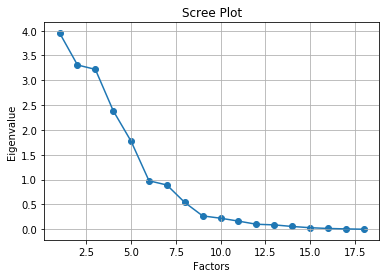

In [4]:
# 绘制碎石图
plt.scatter(range(1, index_time_mean.shape[1]+1), ev)
plt.plot(range(1,index_time_mean.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [5]:
#创建因子分析对象，因子分析方法：主成分法，旋转方式：不旋转，设定因字数为 5
fa1 = FactorAnalyzer(n_factors=5,rotation=None,method='principal')  
fa1.fit(index_time_mean)
pd.DataFrame(np.round(fa1.loadings_, 3),index=index.columns[3:21])# 因子载荷

,0,1,2,3,4
A1,0.789,0.284,-0.212,-0.406,0.004
A2,0.832,0.242,-0.259,-0.349,0.022
A3,0.691,0.407,-0.184,-0.409,0.039
B1,0.642,-0.336,0.015,-0.455,-0.205
B2,-0.493,0.305,0.086,0.234,0.330
B3,0.080,0.543,-0.190,0.102,0.745
B4,0.180,0.450,-0.321,0.101,0.701
C1,0.612,-0.313,-0.259,0.619,-0.170
C2,0.582,-0.179,-0.294,0.719,-0.029
C3,0.531,-0.184,-0.263,0.738,-0.019


In [6]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
# 导入您之前标准化后的数据（假设 index_scaler 已经存在且已处理 NaN）
# 确保在运行这段代码之前，index_scaler 已经通过了中位数填充步骤

# --- 1. 确定需要降维的特征变量（绿色金融分项）---
# 根据您的 data1.2_pca.csv 文件，这些是您要降维的列名
GREEN_FINANCE_COLS = [
    'credit', 'bond', 'investment', 'insurance',
    'equity', 'fund', 'carbon_finance'
]

# 假设 index_scaler 是您已处理好的标准化数据
# 从中选择绿色金融分项作为 FA 的输入
try:
    X_fa_input = index_scaler[GREEN_FINANCE_COLS]
except KeyError:
    print("错误：请检查 index_scaler 中是否存在所有绿色金融分项列名。")
    # 如果您没有使用 index_scaler，请替换为您实际的变量名

# --- 2. 创建因子分析对象，设定因子数为 4，并使用 Varimax 旋转 ---
n_factors_final = 4
fa_final = FactorAnalyzer(
    n_factors=n_factors_final,
    rotation='varimax',  # 使用 Varimax 旋转，使因子结构更清晰
    method='principal'
)

# 模型训练（使用整个面板数据）
fa_final.fit(X_fa_input)

# --- 3. 输出旋转后的因子载荷矩阵（关键结果）---
# 因子载荷矩阵显示了每个原始变量与每个因子的相关程度
factor_loadings = pd.DataFrame(
    np.round(fa_final.loadings_, 3),
    index=GREEN_FINANCE_COLS,
    columns=[f'Factor_{i+1}' for i in range(n_factors_final)]
)

print("\n--- 旋转后的因子载荷矩阵（提取 4 个因子，Varimax 旋转） ---")
print(factor_loadings)

# 导出载荷矩阵，用于论文报告
factor_loadings.to_excel('factor_loadings_4_varimax.xlsx')


# --- 4. 计算因子得分 (Factor Scores) ---
# 因子得分是用于替代原始变量，进行最终计量回归的变量
factor_scores = pd.DataFrame(
    fa_final.transform(X_fa_input),
    columns=[f'Factor_{i+1}' for i in range(n_factors_final)]
)

print("\n因子得分 (Factor Scores) 的前 5 行：")
print(factor_scores.head())

# --- 5. 准备最终回归数据 ---
# 将因子得分与非降维的控制变量合并，用于 xtreg
# 假设非降维变量包括 ln_co2, ln_gdp, 绿色专利等

# 1. 提取非降维变量 (请根据实际列名修改)
CONTROL_COLS = ['co2_emissions', 'gdp', 'green_invention_patents', 'green_utility_patents']
non_fa_variables = index_scaler[CONTROL_COLS].reset_index(drop=True)

# 2. 合并数据：控制变量 + 因子得分
final_regression_data = pd.concat([non_fa_variables, factor_scores], axis=1)

# 导出最终回归数据
final_regression_data.to_csv('final_regression_data_with_factors.csv', index=False)


--- 旋转后的因子载荷矩阵（提取 4 个因子，Varimax 旋转） ---
                Factor_1  Factor_2  Factor_3  Factor_4
credit             0.951    -0.119     0.198    -0.065
bond               0.960    -0.136     0.211    -0.061
investment        -0.066     0.984    -0.135    -0.096
insurance          0.360    -0.204     0.909    -0.042
equity             0.954    -0.132     0.221    -0.071
fund               0.958    -0.130     0.194    -0.052
carbon_finance    -0.271     0.808    -0.147     0.502

因子得分 (Factor Scores) 的前 5 行：
   Factor_1  Factor_2  Factor_3  Factor_4
0 -1.733901 -0.449099 -0.466393  0.237687
1 -1.669713 -0.468661 -0.352631  0.342363
2 -1.392614 -0.476083 -0.507818  0.241357
3 -1.297121 -0.472371 -0.585808  0.040100
4 -1.182955 -0.527492 -0.511767  0.070580


/Users/yumanlou/conda_env/gnews/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/yumanlou/conda_env/gnews/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


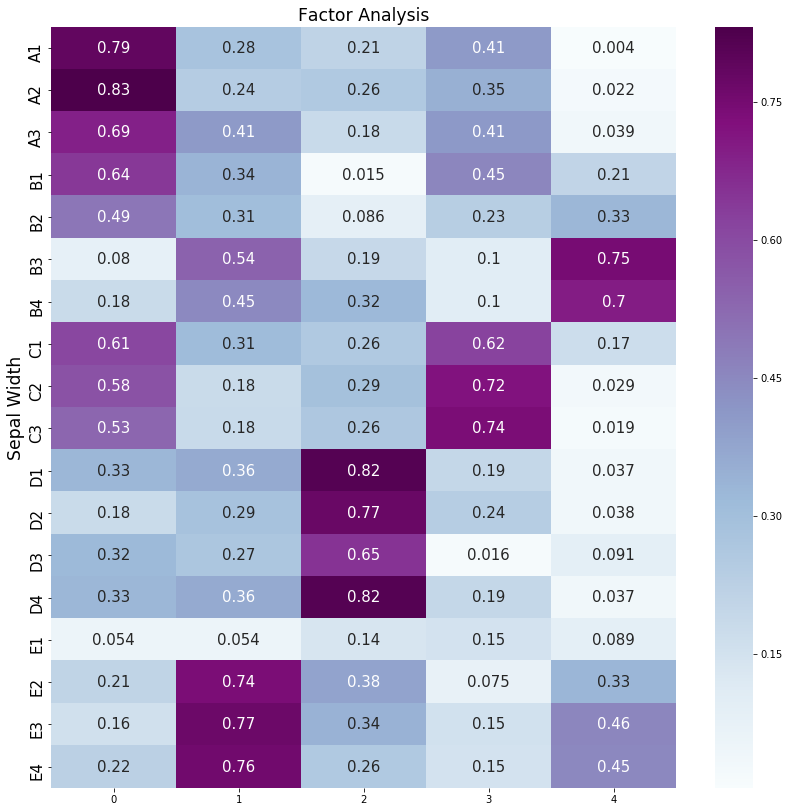

In [6]:
#通过热力图可视化
import seaborn as sns
index_cm = pd.DataFrame(np.abs(fa1.loadings_), index=index.columns[3:21])
plt.figure(figsize = (14,14))
ax = sns.heatmap(index_cm , annot=True, cmap="BuPu",annot_kws={'size':15})
ax.yaxis.set_tick_params(labelsize=15)
plt.title('Factor Analysis', fontsize='xx-large')
plt.ylabel('Sepal Width', fontsize='xx-large')
plt.savefig('factorAnalysis.png', dpi=500)

In [7]:
# 进行因子旋转，旋转方式：方差最大化（varimax），因子分析方法：主成分法，设定因字数为 5
fa2 = FactorAnalyzer(n_factors=5,rotation='varimax',method='principal')  
fa2.fit(index_time_mean)
ev, v = fa2.get_eigenvalues()  # 输出因子相关矩阵和特征值
var2 =  fa2.get_factor_variance() # 输出贡献率

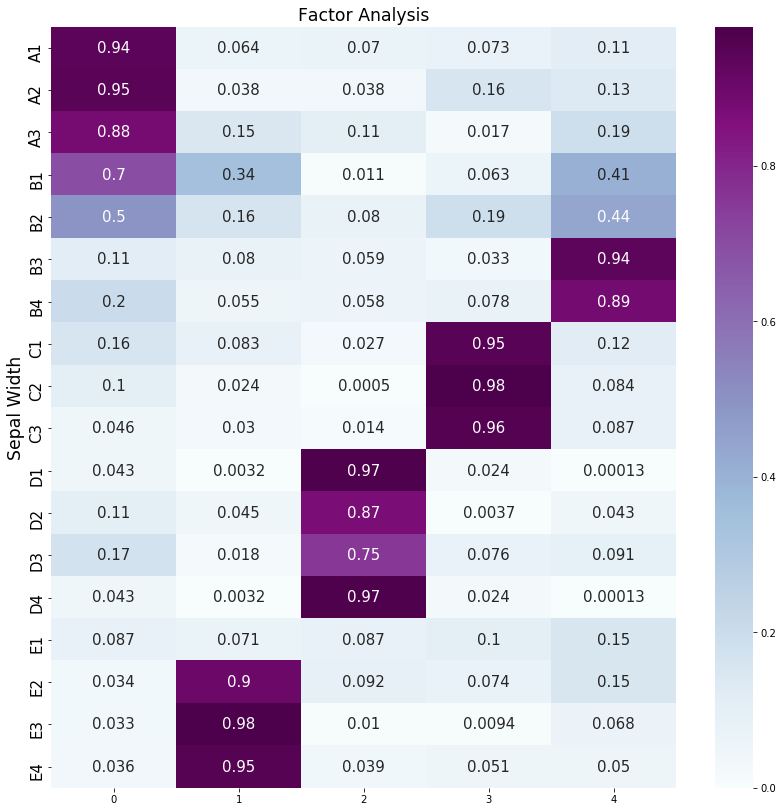

In [8]:
# 因子载荷
pd.DataFrame(np.round(fa2.loadings_,5),index=index.columns[3:21])
#通过热力图可视化:旋转后
import seaborn as sns
index_cm = pd.DataFrame(np.abs(fa2.loadings_), index=index.columns[3:21])
plt.figure(figsize = (14,14))
ax = sns.heatmap(index_cm , annot=True, cmap="BuPu",annot_kws={'size':15})
ax.yaxis.set_tick_params(labelsize=15)
plt.title('Factor Analysis', fontsize='xx-large')
plt.ylabel('Sepal Width', fontsize='xx-large')
plt.savefig('factorAnalysis.png', dpi=500)

In [9]:
#因子得分
#score=( fac1 * fac1贡献率 +  fac2 * fac2贡献率 + ...... +  fac5 * fac5贡献率) / 所有因子的累计贡献率
score = pd.DataFrame(fa2.transform(index_time_mean) * var2[1] / var2[-1][-1]) #以方差贡献率为权数
score.index=index_time_mean.index
score['score'] = score.apply(lambda x: x.sum(), axis=1)#四个因子的总得分
score.sort_values("score", inplace=True, ascending=False)
print(score.head())
score.to_excel('score.xlsx')

              0         1         2         3         4     score
stkcd                                                            
40    -0.297537  0.088342  1.824965  0.188787  0.048616  1.853172
96    -0.211245 -0.005851  0.024852  1.683660  0.135147  1.626563
626   -0.091124  1.649743  0.019933  0.095118 -0.102054  1.571617
590    0.043694  0.045349  0.876879  0.167732 -0.099901  1.033753
70    -0.051142  0.160644  0.937299 -0.113730  0.036486  0.969558


In [10]:
#投资策略：以四个季度为窗口，在窗口期内求出有效因子得分，根据得分排序调整股票池，每季度末调仓
pool=[]
time=[]
for i in range(4,20):
    code2 = index.iloc[:,1:3] #股票代码+时间
    index_new2 = pd.concat([code2,index_scaler],axis = 1)
    index_time_mean2=index_new2[(index_new2["n"]<i+1) & (index_new2["n"]>i-4)].groupby('stkcd').mean()#递归计算均值
    try:
        fa3 = FactorAnalyzer(n_factors=5,rotation='varimax',method='principal')   
        fa3.fit(index_time_mean2.iloc[:,1:])
        
        var_new =  fa3.get_factor_variance() # 输出贡献率
        score_new = pd.DataFrame(fa3.transform(index_time_mean2.iloc[:,1:]) * var_new[1] / var_new[-1][-1])
        score_new.index=index_time_mean2.index
        score_new['score'] = score_new.apply(lambda x: x.sum(), axis=1)#四个因子的总得分
        score_new.sort_values("score", inplace=True, ascending=False)
        pool.append(score_new.head(10).index)
        time.append(i+1)
    except Exception as e:
        print("时间%d出现异常"%(i))
        print('原因:', e)
        
    

C:\Users\LENOVO\Anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:777: UserWarning: Unable to calculate the factor score weights; factor loadings used instead: Singular matrix
  'factor loadings used instead: {}'.format(error))
C:\Users\LENOVO\Anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:777: UserWarning: Unable to calculate the factor score weights; factor loadings used instead: Singular matrix
  'factor loadings used instead: {}'.format(error))


In [11]:
POOL=pd.DataFrame(pool, index=time)#股票池
POOL.to_excel('pool.xlsx')

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer

# --- 假设 X_fa_input 是已加载、已处理 NaN、已标准化的绿色金融分项数据 ---
# GREEN_FINANCE_COLS 列表包含了 7 个绿色金融分项的列名

# 1. 设置最终参数
n_factors_final = 4
GREEN_FINANCE_COLS = [
    'credit', 'bond', 'investment', 'insurance',
    'equity', 'fund', 'carbon_finance'
]

# 假设 X_fa_input 已经通过了之前的步骤生成 (即 index_scaler[GREEN_FINANCE_COLS])
# --- START: 假设 X_fa_input 已准备好 (请确保这一步在你的环境中正确执行) ---
# X_fa_input = index_scaler[GREEN_FINANCE_COLS]
# --- END ---

# --- A. 第一次因子分析：非旋转（用于基准和可视化） ---
fa1 = FactorAnalyzer(n_factors=n_factors_final, rotation=None, method='principal')
fa1.fit(X_fa_input) # 使用整个面板数据

# 1.1 可视化非旋转载荷矩阵
index_cm1 = pd.DataFrame(np.abs(fa1.loadings_), index=GREEN_FINANCE_COLS)
index_cm1.columns = [f'Factor_{i+1}' for i in range(n_factors_final)]

plt.figure(figsize = (10, 8))
ax1 = sns.heatmap(index_cm1, annot=True, cmap="BuPu", annot_kws={'size':12}, fmt=".2f")
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)
plt.title('Non-Rotated Factor Loadings (Absolute Value)', fontsize='x-large')
plt.ylabel('Green Finance Variables', fontsize='large')
plt.savefig('factorAnalysis_NonRotated.png', dpi=300, bbox_inches='tight')
plt.close()


# --- B. 第二次因子分析：Varimax 旋转（用于结果报告和得分计算） ---
fa_final = FactorAnalyzer(n_factors=n_factors_final, rotation='varimax', method='principal')
fa_final.fit(X_fa_input)

# 2.1 输出因子贡献率
ev, v = fa_final.get_eigenvalues()
var_final =  fa_final.get_factor_variance()
var_df = pd.DataFrame(np.round(var_final, 3),
                      index=['SS Loadings', 'Proportion Var', 'Cumulative Var'],
                      columns=[f'Factor_{i+1}' for i in range(n_factors_final)])
print("\n--- 旋转后因子方差贡献率 ---")
print(var_df.T)
var_df.T.to_excel('factor_variance_4.xlsx')

# 2.2 可视化旋转后的载荷矩阵
index_cm2 = pd.DataFrame(np.abs(fa_final.loadings_), index=GREEN_FINANCE_COLS)
index_cm2.columns = [f'Factor_{i+1}' for i in range(n_factors_final)]

plt.figure(figsize = (10, 8))
ax2 = sns.heatmap(index_cm2, annot=True, cmap="BuPu", annot_kws={'size':12}, fmt=".2f")
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)
plt.title('Rotated Factor Loadings (Absolute Value)', fontsize='x-large')
plt.ylabel('Green Finance Variables', fontsize='large')
plt.savefig('factorAnalysis_Rotated_4.png', dpi=300, bbox_inches='tight')
plt.close() # 关闭图形，避免在 Notebook 中堆积


# --- C. 计算因子得分（用于最终回归） ---

# 3.1 计算每个观测值在 4 个因子上的得分
# factor_scores 是一个 N x 4 的 DataFrame
factor_scores = pd.DataFrame(
    fa_final.transform(X_fa_input),
    columns=[f'Factor_{i+1}' for i in range(n_factors_final)]
)

# 3.2 构造总得分 (通常在 FA 中不推荐，计量经济学只需使用 factor_scores 进行 xtreg)
# 原始代码中的加权求和是 FA 常见的综合评价方法，我们保留并修正它。
# 权数是：每个因子的方差贡献率 / 总累计方差贡献率
proportion_var = var_final[1] # 'Proportion Var' (每个因子的方差贡献率)
cumulative_var_total = var_final[2][-1] # 最后一个因子的累计贡献率

# 计算加权因子得分 (Total Score)
# 公式： (Factor_n * Proportion_Var_n) / Cumulative_Var_Total
score = (factor_scores * proportion_var) / cumulative_var_total
score['total_score'] = score.sum(axis=1) # 综合得分

# 3.3 输出和保存结果 (使用原始数据的索引)
# 假设 index_scaler 继承了原始数据的索引
score.index = X_fa_input.index
score.sort_values("total_score", inplace=True, ascending=False)
print("\n--- 综合得分 (Total Factor Score) Top 5 ---")
print(score.head())
score.to_excel('total_factor_score.xlsx')

/Users/yumanlou/conda_env/gnews/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/yumanlou/conda_env/gnews/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- 旋转后因子方差贡献率 ---
          SS Loadings  Proportion Var  Cumulative Var
Factor_1        3.862           0.552           0.552
Factor_2        1.729           0.247           0.799
Factor_3        1.037           0.148           0.947
Factor_4        0.279           0.040           0.987

--- 综合得分 (Total Factor Score) Top 5 ---
     Factor_1  Factor_2  Factor_3  Factor_4  total_score
601 -0.302419  2.099299  0.137049  0.034306     1.968235
600 -0.479750  2.246151  0.145439 -0.138289     1.773551
604 -0.165352  1.529821  0.057311  0.073288     1.495068
607  0.066926  1.367359 -0.007997 -0.036856     1.389432
620  1.079666  0.483116 -0.167624 -0.084204     1.310955


/Users/yumanlou/conda_env/gnews/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


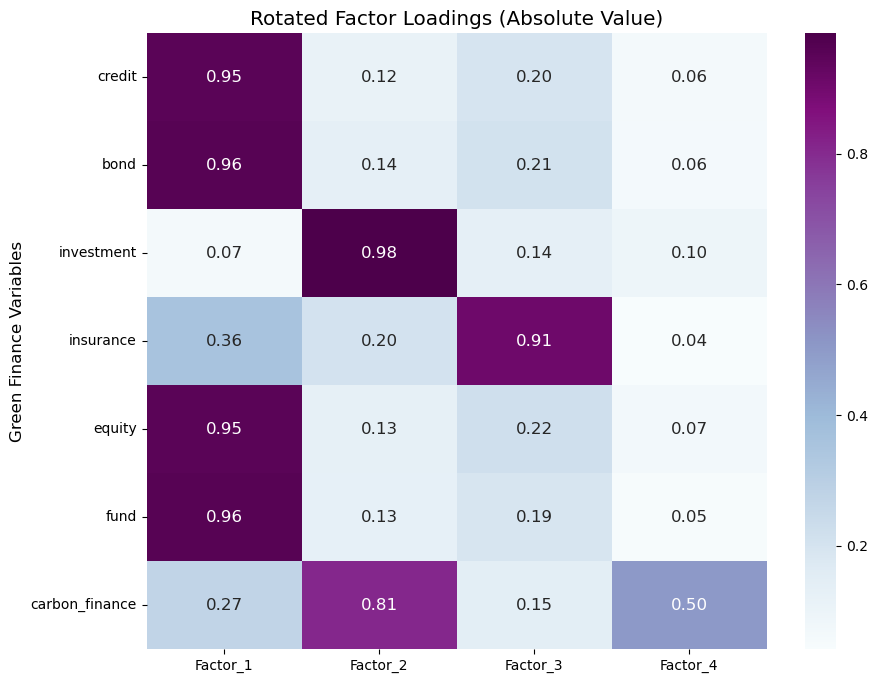

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 假设 fa_final 已经通过之前的代码成功 fit(X_fa_input)

# 1. 准备载荷矩阵 DataFrame
GREEN_FINANCE_COLS = [
    'credit', 'bond', 'investment', 'insurance',
    'equity', 'fund', 'carbon_finance'
]
n_factors_final = 4

index_cm2 = pd.DataFrame(
    np.abs(fa_final.loadings_),
    index=GREEN_FINANCE_COLS
)
index_cm2.columns = [f'Factor_{i+1}' for i in range(n_factors_final)]

# 2. 绘制热力图
plt.figure(figsize = (10, 8))
ax2 = sns.heatmap(index_cm2, annot=True, cmap="BuPu", annot_kws={'size':12}, fmt=".2f")

# 修正和优化标签
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)
plt.title('Rotated Factor Loadings (Absolute Value)', fontsize='x-large')
plt.ylabel('Green Finance Variables', fontsize='large')

# 保存图像
plt.savefig('factorAnalysis_Rotated_4.png', dpi=300, bbox_inches='tight')

# 关键：在 Notebook 的最后一个单元格中，如果想看到图，请确保它被显示
plt.show()

In [11]:
#最终版本

--- 原始数据 NaN 数量检查 ---
green_invention_patents    6
green_utility_patents      6
credit                     0
bond                       0
investment                 0
insurance                  0
equity                     0
fund                       0
carbon_finance             0
dtype: int64

--- 填充后 NaN 数量检查 ---
0

标准化和填充完成。FA输入数据准备就绪。

--- 因子方差贡献率 (Factor Variance) ---
          SS Loadings  Proportion Var  Cumulative Var
Factor_1        3.927           0.436           0.436
Factor_2        1.850           0.206           0.642
Factor_3        2.269           0.252           0.894
Factor_4        0.575           0.064           0.958


/Users/yumanlou/conda_env/gnews/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


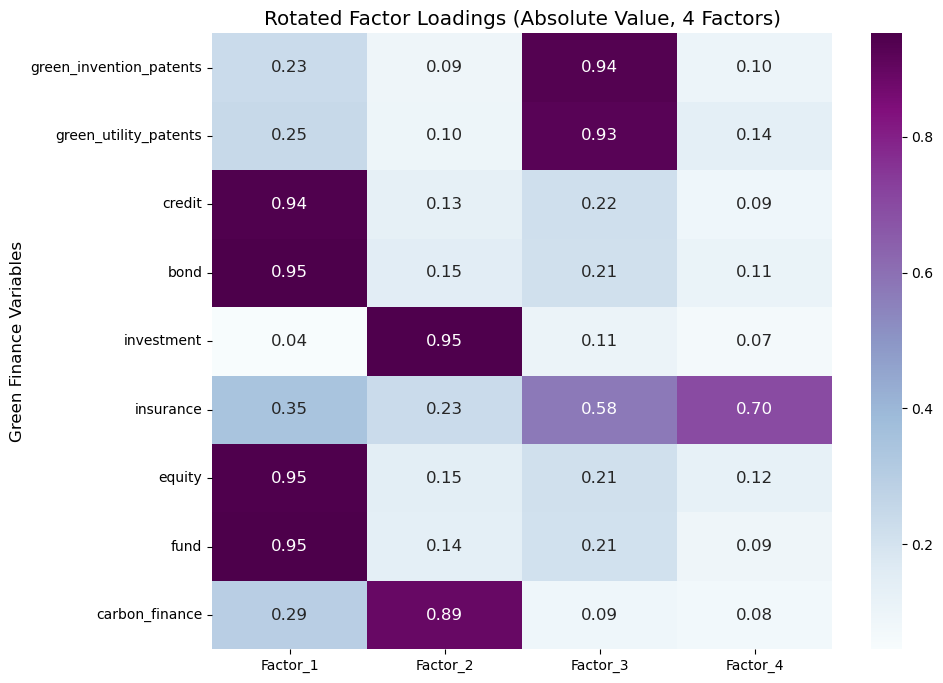


--- 最终回归数据（包含省份/时间标识符和因子得分）Top 5 ---
   province_id  year  co2_emissions     gdp  Factor_1  Factor_4
0            1  2000   7.153818e+07  4880.0 -1.795793 -0.612283
1            1  2001   6.964592e+07  5348.1 -1.727762 -0.446413
2            1  2002   8.086629e+07  5908.1 -1.449441 -0.615270
3            1  2003   9.231935e+07  6952.5 -1.345959 -0.709857
4            1  2004   1.082541e+08  8309.4 -1.224555 -0.597590

数据已成功导出到 'final_regression_data_for_xtreg.csv' 文件！


/Users/yumanlou/conda_env/gnews/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. 数据加载与索引设置 ---
file_path = '/Users/yumanlou/Library/CloudStorage/OneDrive-email.cufe.edu.cn/2025/第五学期/论文/ESG/carbon_emission_finance/data/data1.2.csv'
data = pd.read_csv(file_path)

# 将 province_id 和 year 设置为复合索引，确保不丢失面板信息
PANEL_INDEX_COLS = ['province_id', 'year']
data_indexed = data.set_index(PANEL_INDEX_COLS)

# --- 2. 变量选择 ---
# 您指定的 9 个需要进行因子分析的变量
FA_COLS = [
    'green_invention_patents', 'green_utility_patents',
    'credit', 'bond', 'investment', 'insurance',
    'equity', 'fund', 'carbon_finance'
]

# 提取 FA 输入数据
X_fa_raw = data_indexed[FA_COLS]


# --- 3. 缺失值处理（中位数填充） ---
print("--- 原始数据 NaN 数量检查 ---")
print(X_fa_raw.isnull().sum())

# 使用中位数填充 NaN 值
X_fa_filled = X_fa_raw.fillna(X_fa_raw.median())

print("\n--- 填充后 NaN 数量检查 ---")
print(X_fa_filled.isnull().sum().sum()) # 检查总数是否为 0


# --- 4. Z-Score 标准化 ---
scaler = StandardScaler()
X_fa_scaled_array = scaler.fit_transform(X_fa_filled)

# 转换回 DataFrame，并保留复合索引
X_fa_input = pd.DataFrame(
    X_fa_scaled_array,
    columns=FA_COLS,
    index=data_indexed.index  # 继承原始的 (province_id, year) 索引
)

print("\n标准化和填充完成。FA输入数据准备就绪。")


# --- 5. 因子分析 (Factor Analysis) ---
n_factors_final = 4

# 创建因子分析对象，使用 Varimax 旋转（利于解释）
fa_final = FactorAnalyzer(
    n_factors=n_factors_final,
    rotation='varimax',
    method='principal'
)

# 模型训练
fa_final.fit(X_fa_input)


# --- 6. 结果输出与保存 ---

# 6.1 输出因子贡献率 (用于论文报告)
var_final = fa_final.get_factor_variance()
var_df = pd.DataFrame(
    np.round(var_final, 3),
    index=['SS Loadings', 'Proportion Var', 'Cumulative Var'],
    columns=[f'Factor_{i+1}' for i in range(n_factors_final)]
)
print("\n--- 因子方差贡献率 (Factor Variance) ---")
print(var_df.T)
var_df.T.to_excel('factor_variance_4_final.xlsx')


# 6.2 绘制旋转后的因子载荷热力图
factor_loadings = pd.DataFrame(
    np.abs(fa_final.loadings_),
    index=FA_COLS
)
factor_loadings.columns = [f'Factor_{i+1}' for i in range(n_factors_final)]

plt.figure(figsize = (10, 8))
ax = sns.heatmap(factor_loadings, annot=True, cmap="BuPu", annot_kws={'size':12}, fmt=".2f")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.title(f'Rotated Factor Loadings (Absolute Value, {n_factors_final} Factors)', fontsize='x-large')
plt.ylabel('Green Finance Variables', fontsize='large')
plt.savefig('factorAnalysis_Rotated_4_Final.png', dpi=300, bbox_inches='tight')
plt.show() # 在 Jupyter 环境中显示图形

# 6.3 计算因子得分 (Factor Scores) --- 最终回归数据
factor_scores_array = fa_final.transform(X_fa_input)

# 转换为 DataFrame，并继承 (province_id, year) 索引
factor_scores = pd.DataFrame(
    factor_scores_array,
    columns=[f'Factor_{i+1}' for i in range(n_factors_final)],
    index=X_fa_input.index
)


# --- 7. 生成最终回归数据文件 ---

# 提取原始数据中未参与 FA 的变量 (如因变量 co2_emissions 和控制变量 gdp 等)
# 排除掉 FA_COLS，然后合并
non_fa_variables = data_indexed.drop(columns=FA_COLS)

# 合并所有变量 (非 FA 变量 + 4 个因子得分)
final_regression_data = pd.concat([non_fa_variables, factor_scores], axis=1)

# 将复合索引 (province_id, year) 重置为普通列
final_regression_data = final_regression_data.reset_index()

print("\n--- 最终回归数据（包含省份/时间标识符和因子得分）Top 5 ---")
print(final_regression_data[['province_id', 'year', 'co2_emissions', 'gdp', 'Factor_1', 'Factor_4']].head())

# 导出最终文件，用于 Stata/Python 的 xtreg 回归
final_regression_data.to_csv('final_regression_data_for_xtreg.csv', index=False)
print("\n数据已成功导出到 'final_regression_data_for_xtreg.csv' 文件！")

In [14]:
#三因子版本

/Users/yumanlou/conda_env/gnews/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- 因子方差贡献率 (Factor Variance) ---
          SS Loadings  Proportion Var  Cumulative Var
Factor_1        3.895           0.433           0.433
Factor_2        1.855           0.206           0.639
Factor_3        2.586           0.287           0.926


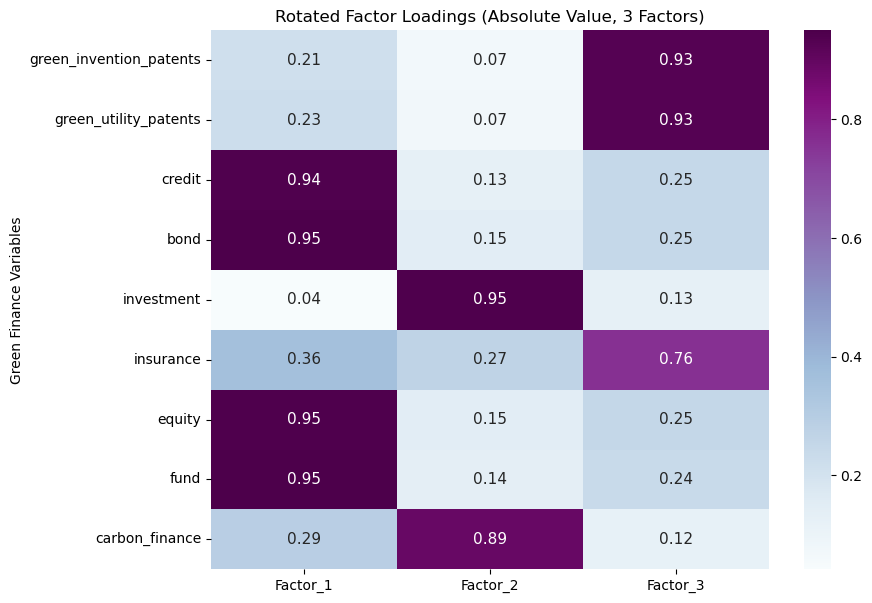


--- 最终回归数据（包含省份/时间标识符和 3 个因子得分）Top 5 ---
   province_id  year  co2_emissions     gdp  Factor_1  Factor_3
0            1  2000   7.153818e+07  4880.0 -1.821561 -0.194708
1            1  2001   6.964592e+07  5348.1 -1.745872 -0.164422
2            1  2002   8.086629e+07  5908.1 -1.474437 -0.242944
3            1  2003   9.231935e+07  6952.5 -1.375200 -0.273529
4            1  2004   1.082541e+08  8309.4 -1.248505 -0.265377

数据已成功导出到 'final_regression_data_for_xtreg.csv' 文件！


/Users/yumanlou/conda_env/gnews/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. 数据加载与索引设置 ---
# 假设 'data1.2.csv' 是您当前使用的文件
file_path = '/Users/yumanlou/Library/CloudStorage/OneDrive-email.cufe.edu.cn/2025/第五学期/论文/ESG/carbon_emission_finance/data/data1.2.csv'
data = pd.read_csv(file_path)

# 将 province_id 和 year 设置为复合索引，这是面板数据的关键
PANEL_INDEX_COLS = ['province_id', 'year']
data_indexed = data.set_index(PANEL_INDEX_COLS)

# --- 2. 变量选择 ---
# 您指定的 9 个需要进行因子分析的变量（包含专利和绿色金融分项）
FA_COLS = [
    'green_invention_patents', 'green_utility_patents',
    'credit', 'bond', 'investment', 'insurance',
    'equity', 'fund', 'carbon_finance'
]

X_fa_raw = data_indexed[FA_COLS]


# --- 3. 缺失值处理（中位数填充） ---
# 填充 NaN 值并确保索引不变
X_fa_filled = X_fa_raw.fillna(X_fa_raw.median())


# --- 4. Z-Score 标准化 ---
scaler = StandardScaler()
X_fa_scaled_array = scaler.fit_transform(X_fa_filled)

# 转换回 DataFrame，并保留复合索引
X_fa_input = pd.DataFrame(
    X_fa_scaled_array,
    columns=FA_COLS,
    index=data_indexed.index  # 继承原始的 (province_id, year) 索引
)


# --- 5. 因子分析 (Factor Analysis) ---
n_factors_final = 3 # 设定提取 3 个因子

# 创建因子分析对象，使用 Varimax 旋转
fa_final = FactorAnalyzer(
    n_factors=n_factors_final,
    rotation='varimax',
    method='principal'
)

# 模型训练
fa_final.fit(X_fa_input)


# --- 6. 结果输出与可视化 ---

# 6.1 输出因子贡献率
var_final = fa_final.get_factor_variance()
var_df = pd.DataFrame(
    np.round(var_final, 3),
    index=['SS Loadings', 'Proportion Var', 'Cumulative Var'],
    columns=[f'Factor_{i+1}' for i in range(n_factors_final)]
)
print("\n--- 因子方差贡献率 (Factor Variance) ---")
print(var_df.T)
var_df.T.to_excel('factor_variance_3_final.xlsx')


# 6.2 绘制旋转后的因子载荷热力图
factor_loadings = pd.DataFrame(
    np.abs(fa_final.loadings_),
    index=FA_COLS
)
factor_loadings.columns = [f'Factor_{i+1}' for i in range(n_factors_final)]

plt.figure(figsize = (9, 7))
ax = sns.heatmap(factor_loadings, annot=True, cmap="BuPu", annot_kws={'size':11}, fmt=".2f")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.title(f'Rotated Factor Loadings (Absolute Value, {n_factors_final} Factors)', fontsize='large')
plt.ylabel('Green Finance Variables', fontsize='medium')
plt.savefig('factorAnalysis_Rotated_3_Final.png', dpi=300, bbox_inches='tight')
plt.show()


# --- 7. 生成最终回归数据文件 ---

# 7.1 计算 3 个因子得分
factor_scores_array = fa_final.transform(X_fa_input)

# 转换为 DataFrame，并继承 (province_id, year) 索引
factor_scores = pd.DataFrame(
    factor_scores_array,
    columns=[f'Factor_{i+1}' for i in range(n_factors_final)],
    index=X_fa_input.index
)


# 7.2 合并所有变量 (非 FA 变量 + 3 个因子得分)
# 提取原始数据中未参与 FA 的变量（例如因变量和控制变量）
non_fa_variables = data_indexed.drop(columns=FA_COLS)
final_regression_data = pd.concat([non_fa_variables, factor_scores], axis=1)

# 将复合索引 (province_id, year) 重置为普通列，方便导出
final_regression_data = final_regression_data.reset_index()

print("\n--- 最终回归数据（包含省份/时间标识符和 3 个因子得分）Top 5 ---")
print(final_regression_data[['province_id', 'year', 'co2_emissions', 'gdp', 'Factor_1', 'Factor_3']].head())

# 导出最终文件，用于 Stata/Python 的 xtreg 回归
final_regression_data.to_csv('final_regression_data_for_xtreg.csv', index=False)
print("\n数据已成功导出到 'final_regression_data_for_xtreg.csv' 文件！")